In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
%matplotlib inline

In [3]:
num_dataset = np.array([[0.22,0.34,0], [0.21,0.37,0], [0.25,0.31,0], [0.76,0.19,1], [0.84,0.14,1]])

In [4]:
features = num_dataset[:,:2]
labels = num_dataset[:,2].reshape((num_dataset.shape[0],1))

Text(0.5, 1.0, 'Input data')

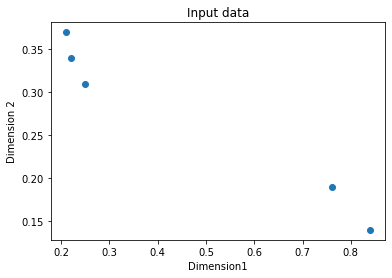

In [5]:
plt.scatter(features[:,0],features[:,1])
plt.xlabel('Dimension1')
plt.ylabel('Dimension 2')
plt.title('Input data')

In [6]:
dim1_min,dim1_max,dim2_min,dim2_max = 0,1,0,1

In [7]:
num_output = labels.shape[1]

In [8]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]

In [9]:
perceptron = nl.net.newp([dim1, dim2], num_output)

The goal of learning is reached


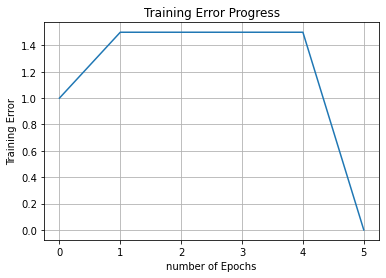

In [10]:
error_progress =perceptron.train(features, labels, epochs=100, show=20, lr=0.03)

plt.plot(error_progress)
plt.xlabel('number of Epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [11]:
perceptron.sim([[0.81 ,0.23]])

array([[1.]])

In [12]:
perceptron.sim([[0.27 ,0.42]])

array([[0.]])

# 3.Single Layer Neural Network

.collection of artificial nuerons

In [13]:
text = np.loadtxt('data_simple_nn.txt')
data = text[:,0:2]
labels = text[:,2:]

text

array([[1. , 4. , 0. , 0. ],
       [1.1, 3.9, 0. , 0. ],
       [1.2, 4.1, 0. , 0. ],
       [0.9, 3.7, 0. , 0. ],
       [7. , 4. , 0. , 1. ],
       [7.2, 4.1, 0. , 1. ],
       [6.9, 3.9, 0. , 1. ],
       [7.1, 4.2, 0. , 1. ],
       [4. , 1. , 1. , 0. ],
       [4.1, 0.9, 1. , 0. ],
       [4.2, 1.1, 1. , 0. ],
       [3.9, 0.8, 1. , 0. ],
       [4. , 7. , 1. , 1. ],
       [4.2, 7.2, 1. , 1. ],
       [3.9, 7.1, 1. , 1. ],
       [4.1, 6.8, 1. , 1. ]])

In [14]:
labels

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

Text(0.5, 1.0, 'Input Data')

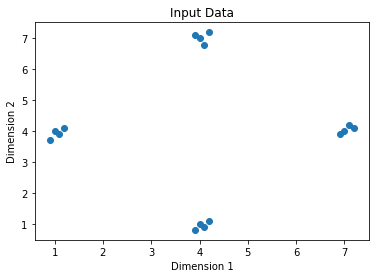

In [15]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')

In [16]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max() 
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()
num_output = labels.shape[1]

dim1 = [dim1_min,dim1_max]
dim2 = [dim2_min,dim2_max]

snn = nl.net.newp([dim1,dim2],num_output)

In [17]:
error_progress = snn.train(data, labels, epochs=100, show=20 , lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


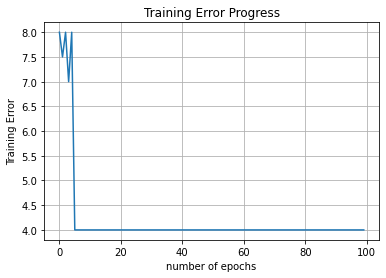

In [18]:
plt.plot(error_progress)
plt.xlabel('number of epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [19]:
print('Testing Data')
testing_data = [[0.3,4.2],[4.3,0.5],[4.6,8]]
for i in testing_data:
    print(i, '==>',snn.sim([i])[0])

Testing Data
[0.3, 4.2] ==> [0. 0.]
[4.3, 0.5] ==> [1. 0.]
[4.6, 8] ==> [1. 1.]


# Multi-Layer Neural Network
- y=3x^2+5

In [20]:
min_vals =-20
max_vals = 20
num_points= 140

x = np.linspace(min_vals, max_vals, num_points)
y= 3*np.square(x)+5
y /=np.linalg.norm(y)


Text(0.5, 1.0, 'Data Points')

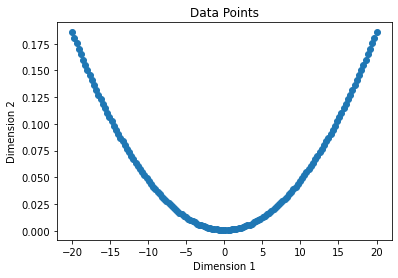

In [23]:
data = x.reshape(num_points,1)
labels = y.reshape(num_points,1)

plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title("Data Points")

In [24]:
mlnn =nl.net.newff([[min_vals,max_vals]],[10,6,1])
mlnn.trainf =nl.train.train_gd
error_progress = mlnn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.04706480524587982;
Epoch: 200; Error: 0.020295850539767346;
The goal of learning is reached


Text(0.5, 1.0, 'Actual vs. Predicted')

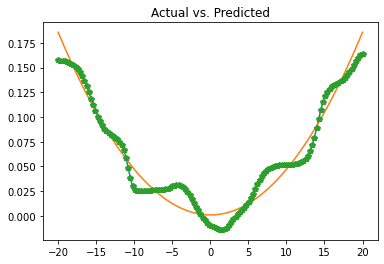

In [25]:
output = mlnn.sim(data)
y_pred = output.reshape(num_points)

x_dense =np.linspace(min_vals, max_vals,num_points*2)
y_dense_pred = mlnn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.plot(x_dense, y_dense_pred, '-',x,y,'-',x , y_pred, 'p')
plt.title('Actual vs. Predicted')

# Recurrent Neural Network
- Analysis of sequensial data(whether,stock,traffic,video feeds)
- suitable for time series
- require more complex architecture

In [29]:
def get_data(num_points):
    w_one = 0.6 * np.sin(np.arange(0, num_points))
    w_two = 3.5 * np.sin(np.arange(0, num_points))
    w_three = 1.2 * np.sin(np.arange(0, num_points))
    w_four = 4.6 * np.sin(np.arange(0, num_points))
    
    a_one = np.ones(num_points)
    a_two = 2.2 + np.zeros(num_points)
    a_three = 3.1 * np.ones(num_points)
    a_four = 0.9 + np.zeros(num_points)
    
    wave =np.array([w_one, w_two, w_three, w_four]).reshape(num_points*4,1)
    amp =np.array([a_one,a_two,a_three,a_four]).reshape(num_points*4,1)
    
    return wave , amp

def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test*4))
    plt.plot(output.reshape(num_points_test*4))
    
if __name__ == '__main__':
    num_points = 50
    wave, amp = get_data(num_points)

In [32]:
nn = nl.net.newelm([[-2,2]],[10,1], [nl.trans.TanSig(), nl.trans.PureLin()])

In [33]:
nn.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
nn.init()

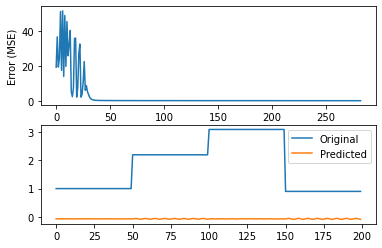

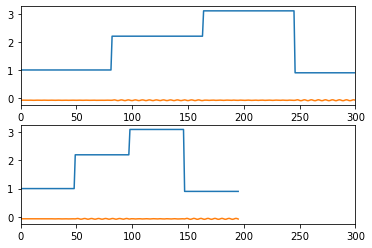

In [34]:
# error_progress = nn.train(wave, amp, epochs=1200, show=100, goal=0.01)

output = nn.sim(wave)

# Plot the results
plt.subplot(211)
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')

plt.subplot(212)
plt.plot(amp.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend(['Original', 'Predicted'])

    # Testing the network performance on unknown data 
plt.figure()

plt.subplot(211)
visualize_output(nn, 82)
plt.xlim([0, 300])

plt.subplot(212)
visualize_output(nn, 49)
plt.xlim([0, 300])

plt.show()